# Análise dos dados abertos da ANTT

Guilherme Eduardo Silva Batalhoti

Os dados utilizados nesse notebook vêm da página de Dados Abertos da ANTT (Agência Nacional de Transportes Terrestres), mais especificamente do grupo "Rodovias", disponível no [link](https://dados.antt.gov.br/group/rodovias]). Para saber mais sobre o Portal de Dados Abertos da ANTT veja o seguinte [link](https://dados.antt.gov.br/about).

## Objetivo

O objetivos é analizar os dados disponíveis no Portal, em especial, as vizualização que já foram feitas e disponibilizadas no Portal.

## Vizualizações disponíveis e Análises

### 1. Sinalização Proibido Ultrapassar

![Proibido Ultrapassar](notebook_images/proibido_ultrapassar1.png)

Pela imagem é possível observar que existe um problema na vizualização dos dados. Pois, na parte direita da imagem, onde mostra os estados nas quais a sizalização está presente, o estado do Mato Grosso(MT) não está marcado e o Estado de Montana nos Estados Unidos (EUA) está marcado com os dados do MT.

![Proibido Ultrapassar](notebook_images/proibido_ultrapassar2.png)

### 2. Sinalização Velocidade Máxima

![Velocidade Máxima](notebook_images/velocidade_maxima.png)

Pela imagem é possível observar que há novamente um problema parecido com o anterior. Porém, dessa vez há dois estados nos EUA marcados com os dados do MT e o próprio MT não.


### 3. Tráfego por Praça de Pedágio

![Problema de Acesso](notebook_images/trafego_praca_pedag.png)

Não está ecessível pelo link. Não foi possível analisar.

### 4. Tráfego Equivalente por Praça de Pedágio


![Problema de Acesso](notebook_images/trafego_equiv_praca_pedag.png)

Não está ecessível pelo link. Não foi possível analisar.

### 5. Praças de Pedágio

![Praças de Pedágio](notebook_images/praca_pedagio.png)

Novamente, os dados dos EUA estão marcados com os dados do MT. E, também, há um pedágio do rigo Grande do Sul marcado na Indonésia (pedágio do múnicípio de Cangaçu na BR-392 km 111.40).

### 6. Receita por Praça de Pedágio

![Receita por Praça de Pedágio](notebook_images/receita_praca_pedagio.png)

Dessa vez, não apresenta problemas na vizualização no mapa, entretanto as duas primeiras praças de pedágio estão marcadas como recebendo R$0 de receita sem mais nenhuma informação à respeito.

###  7. Autos de Infração de Transito

![Autos de Infração de Transito](notebook_images/autos_infracao.png)

Mais uma vez, os dados dos EUA estão marcados com os dados do MT, bem como dados do Pará (PA) e do Maranhão (MA).

### 8. Radares

![Radares](notebook_images/radares.png)

Os dados dos EUA estão marcados com os dados do MT, e há um radar na Europa (Município de Dueré, BR-153, Ecovias do Araguaia).

### 9. Cabines

![Cabines](notebook_images/cabines.png)

Aqui não aparece nenhum problema na vizualização dos dados, as marcações são apenas de quantidade de cabines por concessionária.

### 10. SAT (Contador de Tráfego Veicular)

![SAT](notebook_images/sat.png)

Na vizualação por estados, um estado dos EUA está marcado com os dados do MT.

### 11. CFTV (Circuito Fechado de Televisão)

![CFTV](notebook_images/cftv.png)

Na vizualação por estados, um estado dos EUA está marcado com os dados do MT e outro com dados do PA.

### 12. PMV (Painel de Mensagem Variável)

![PMV](notebook_images/pmv.png)

Mais uma vez os EUA marcados com os dados do MT.

### 13. PPV (Posto de Pesagem Veicular)

![PPV](notebook_images/ppv.png)

Os dados dos EUA estão marcados com os dados do MT.


### 14. PRF (Polícia Rodoviária Federal)

![PRF](notebook_images/prf.png)

Os dados dos EUA estão marcados com os dados do MT.

## Observações sobre o notebook

Este notebook está no [GitHub](https://github.com/GuiBatalhoti/Dados_ANTT) e está sendo desenvolvido de forma local, porém devido à necessidade de acesso de outros colaboradores, o notebook também está no Google Colab.

Na necessidade de execução pelo Colab, executar a seguinte célula:

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import folium
import shapely
# from shapely import wkt
# from shapely import frechet_distance

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Abrindo os dados de KM de Pista

Especificações em: data/km_pista/quilometro_principal_dicionario_dados.pdf

In [3]:
pista_principal_df = pd.read_csv('../data/ANTT/km_pista_principal/dados_dos_quilometro_principal.csv', sep=';', encoding='latin1')
pista_marginal_df = pd.read_csv('../data/ANTT/km_pista_marginal/dados_dos_quilometro_marginal.csv', sep=';', encoding='latin1')
sinalizacao_ultrapassagem_df = pd.read_csv('../data/ANTT/sinalizacao/proibido_ultrapassar.csv', sep=';', encoding='latin1')
sinalizacao_velocidade_df = pd.read_csv('../data/ANTT/sinalizacao/velocidade_maxima.csv', sep=';', encoding='latin1')
radar_df = pd.read_csv('../data/ANTT/radar/dados_dos_radares.csv', sep=';', encoding='latin1')
edificacao_operac_df = pd.read_csv('../data/ANTT/edificacao_operacional/dados_da_edificacao_operacional.csv', sep=';', encoding='latin1')
cftv_df = pd.read_csv('../data/ANTT/cftv/dados_dos_cftvs.csv', sep=';', encoding='latin1')
fibra_optica_df = pd.read_csv('../data/ANTT/fibra_otica/dados_da_fibra_otica.csv', sep=';', encoding='latin1')

In [4]:
print('pista_principal_df:\n\n', pista_principal_df.head(), pista_principal_df.info())
print("=====================================================================================================")
print('pista_marginal_df:\n\n', pista_marginal_df.head(), pista_marginal_df.info())
print("=====================================================================================================")
print('sinalizacao_ultrapassagem_df:\n\n', sinalizacao_ultrapassagem_df.head(), sinalizacao_ultrapassagem_df.info())
print("=====================================================================================================")
print('sinalizacao_velocidade_df:\n\n', sinalizacao_velocidade_df.head(), sinalizacao_velocidade_df.info())
print("=====================================================================================================")
print('radar_df:\n\n', radar_df.head(), radar_df.info())
print("=====================================================================================================")
print('edificacao_operac_df:\n\n', edificacao_operac_df.head(), edificacao_operac_df.info())
print("=====================================================================================================")
print('cftv_df:\n\n', cftv_df.head(), cftv_df.info())
print("=====================================================================================================")
print('fibra_optica_df:\n\n', fibra_optica_df.head(), fibra_optica_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255127 entries, 0 to 255126
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   concessionaria  255127 non-null  object
 1   ano_do_pnv_snv  255127 non-null  int64 
 2   rodovia         255127 non-null  object
 3   km_m            255127 non-null  object
 4   sentido         255127 non-null  object
 5   latitude        255127 non-null  object
 6   longitude       255127 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.6+ MB
pista_principal_df:

           concessionaria  ano_do_pnv_snv    rodovia    km_m      sentido  \
0  AUTOPISTA FERNÃO DIAS            2007  BR-381/SP  22,600  Decrescente   
1  AUTOPISTA FERNÃO DIAS            2007  BR-381/SP  22,400  Decrescente   
2  AUTOPISTA FERNÃO DIAS            2007  BR-381/SP  22,200  Decrescente   
3  AUTOPISTA FERNÃO DIAS            2007  BR-381/SP  22,000  Decrescente   
4  AUTOPISTA FERNÃO DIAS        

In [5]:
pista_principal_df['latitude'] = pista_principal_df['latitude'].str.replace(',', '.').astype(float)
pista_principal_df['longitude'] = pista_principal_df['longitude'].str.replace(',', '.').astype(float)
pista_principal_df['km_m'] = pista_principal_df['km_m'].str.replace(',', '.').astype(float)
pista_marginal_df['latitude'] = pista_marginal_df['latitude'].str.replace(',', '.').astype(float)
pista_marginal_df['longitude'] = pista_marginal_df['longitude'].str.replace(',', '.').astype(float)
pista_marginal_df['km_m'] = pista_marginal_df['km_m'].str.replace(',', '.').astype(float)
# sinalizacao_ultrapassagem_df['latitude'] = sinalizacao_ultrapassagem_df['latitude'].str.replace(',', '.').astype(float)
# sinalizacao_ultrapassagem_df['longitude'] = sinalizacao_ultrapassagem_df['longitude'].str.replace(',', '.').astype(float)
sinalizacao_velocidade_df['latitude'] = sinalizacao_velocidade_df['latitude'].str.replace(',', '.').astype(float)
sinalizacao_velocidade_df['longitude'] = sinalizacao_velocidade_df['longitude'].str.replace(',', '.').astype(float)
radar_df['situacao'] = radar_df['situacao'].map({'Ativo': 1, 'Inativo': 0})
radar_df['latitude'] = radar_df['latitude'].str.replace(',', '.').astype(float)
radar_df['longitude'] = radar_df['longitude'].str.replace(',', '.').astype(float)
edificacao_operac_df['latitude'] = edificacao_operac_df['latitude'].str.replace(',', '.').astype(float)
edificacao_operac_df['longitude'] = edificacao_operac_df['longitude'].str.replace(',', '.').astype(float)
cftv_df['latitude'] = cftv_df['latitude'].str.replace(',', '.').astype(float)
cftv_df['longitude'] = cftv_df['longitude'].str.replace(',', '.').astype(float)
fibra_optica_df['latitude_inicial'] = fibra_optica_df['latitude_inicial'].str.replace(',', '.').astype(float)
fibra_optica_df['longitude_inicial'] = fibra_optica_df['longitude_inicial'].str.replace(',', '.').astype(float)
fibra_optica_df['latitude_final'] = fibra_optica_df['latitude_final'].str.replace(',', '.').astype(float)
fibra_optica_df['longitude_final'] = fibra_optica_df['longitude_final'].str.replace(',', '.').astype(float)

Colocando os dados de forma "Crua" no mapa, desconsiderando o sentido

In [6]:
mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

cores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'gray', 'black']
rodovia = pista_principal_df['rodovia'].iloc[0]
sentido = pista_principal_df['sentido'].iloc[0]
pontos_linha  = []
for i, linha in pista_principal_df.iterrows():
    if linha['rodovia'] != rodovia:
        mapa.add_child(folium.PolyLine(locations=pontos_linha, 
                                       color=cores[np.random.randint(0, len(cores))], 
                                       alpha=0.7,
                                       weight=3, 
                                       popup=folium.Popup(f"{rodovia}\n{linha['concessionaria']}")))
        rodovia = linha['rodovia']
        sentido = linha['sentido']
        pontos_linha = []
    pontos_linha.append([linha['latitude'], linha['longitude']])
mapa.save('../output/mapa_rodovias_cru.html')

É possível obervar que algumas rodovias apresentam "riscos" que  cortam todo o seu trajeto, o que pode ser um erro de preenchimento dos dados. Exemplos:
- BR-163/MS (RIOSP)
- BR-163/MT (CRO)
- BR-163/MT (ECO050)
- BR-364/MT (CRO)
- BR-70/MT (CRO)
- BR-116/RJ (RODOVIA DO AÇO)

Em alguns casos, podemos observar que o "risco" atravessa todo o comprimenro da rodovia, que pode estar relacionado à desconsideração do sentido da rodovia. Exemplos:
- BR-116/SP (AUTOPISTA REGIS BITTENCOURT)
- BR-262/MG (CRO)
- BR-153/MG (CONCEBRA)

Transformando os dados em GeoDataFrame para melhor manipulação

In [ ]:
def df2gdf_linestring(df: pd.DataFrame, ignora_sentido: bool) -> gpd.GeoDataFrame:
    df.sort_values(['rodovia', 'sentido', 'km_m'], inplace=True, ignore_index=True)
    df_return = {
        "rodovia": [],
        "sentido": [],
        "concessionaria": [],
        "km": [],
        "ano_do_pnv_snv": [],
        "geometry": []
    }
    pontos = []

    linha_anterior = df.iloc[0]
    for i, linha in df.iterrows():
        if linha['rodovia'] != linha_anterior['rodovia'] or (linha['sentido'] != linha_anterior['sentido'] and not ignora_sentido):
            df_return["rodovia"].append(linha_anterior['rodovia'])
            df_return["sentido"].append(linha_anterior['sentido'])
            df_return["concessionaria"].append(linha_anterior['concessionaria'])
            df_return["km"].append(df[(df['rodovia'] == linha_anterior['rodovia']) &
                                  (df['sentido'] == linha_anterior['sentido']) &
                                  (df['concessionaria'] == linha_anterior['concessionaria'])]['km_m'].max())
            df_return["ano_do_pnv_snv"].append(linha_anterior['ano_do_pnv_snv'])
            if len(pontos) > 1:
                df_return["geometry"].append(shapely.geometry.LineString(pontos))
            else:
                pontos.append((linha_anterior['longitude'], linha_anterior['latitude']))
                df_return["geometry"].append(shapely.geometry.LineString(pontos))
            pontos = []
            
        pontos.append((linha['longitude'], linha['latitude']))
        linha_anterior = linha


    return gpd.GeoDataFrame(df_return, crs="EPSG:4326")

In [41]:
br101_geral_df = pista_principal_df[pista_principal_df['rodovia'].str.startswith('BR-101')]
br101_geral_gdf = df2gdf_linestring(br101_geral_df, True)
print(br101_geral_gdf.head())
print(br101_geral_gdf.info())
br101_geral_gdf.to_file('../data/DATA_FUSION/BR101-Geral/br101_pista_line.geojson', driver='GeoJSON')
br101_geral_df.sort_values(['rodovia', 'km_m', 'sentido'])
br101_geral_df.to_csv('../data/DATA_FUSION/BR101-Geral/br101_pista.csv', index=False)
print(br101_geral_df.head())
print(br101_geral_df.info())

/tmp/ipykernel_636082/3570669313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(['rodovia', 'km_m', 'sentido'], inplace=True, ignore_index=True)


     rodovia      sentido concessionaria       km  ano_do_pnv_snv  \
0  BR-101/BA  Decrescente         ECO101  956.900            2020   
1  BR-101/ES  Decrescente         ECO101  461.054            2020   
2  BR-101/RJ  Decrescente          RIOSP  598.600            2000   
3  BR-101/RS  Decrescente        VIA SUL   87.900            2019   
4  BR-101/SC    Crescente   VIA COSTEIRA  464.200            2020   

                                            geometry  
0  LINESTRING (-39.86679 -18.04251, -39.86679 -18...  
1  LINESTRING (-39.91817 -18.17485, -39.91817 -18...  
2  LINESTRING (-41.30947 -21.22261, -41.30947 -21...  
3  LINESTRING (-49.77038 -29.29990, -49.77021 -29...  
4  LINESTRING (-48.88637 -25.98162, -48.88637 -25...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rodovia         5 non-null      object  
 1   sent

In [24]:
br101_geral_gdf.drop_duplicates()
br101_geral_gdf.to_file('../data/DATA_FUSION/BR101-Geral/br101_pista.csv', driver='GeoJSON')

In [ ]:
pista_principal_gdf = df2gdf_linestring(pista_principal_df, True)
pista_principal_gdf.to_file('../data/ANTT/km_pista_principal/pista_principal.geojson', driver='GeoJSON')
pista_marginal_gdf = df2gdf_linestring(pista_marginal_df, True)
sinalizacao_velocidade_gdf = gpd.GeoDataFrame(sinalizacao_velocidade_df, crs="EPSG:4326", geometry=gpd.points_from_xy(sinalizacao_velocidade_df['longitude'], sinalizacao_velocidade_df['latitude']))
radar_gdf = gpd.GeoDataFrame(radar_df, crs="EPSG:4326", geometry=gpd.points_from_xy(radar_df['longitude'], radar_df['latitude']))
edificacao_operac_gdf = gpd.GeoDataFrame(edificacao_operac_df, crs="EPSG:4326", geometry=gpd.points_from_xy(edificacao_operac_df['longitude'], edificacao_operac_df['latitude']))
cftv_gdf = gpd.GeoDataFrame(cftv_df, crs="EPSG:4326", geometry=gpd.points_from_xy(cftv_df['longitude'], cftv_df['latitude']))
fibra_optica_inicial_gdf = gpd.GeoDataFrame(fibra_optica_df, crs="EPSG:4326", geometry=gpd.points_from_xy(fibra_optica_df['longitude_inicial'], fibra_optica_df['latitude_inicial']))
fibra_optica_final_gdf = gpd.GeoDataFrame(fibra_optica_df, crs="EPSG:4326", geometry=gpd.points_from_xy(fibra_optica_df['longitude_final'], fibra_optica_df['latitude_final']))

In [ ]:
print('pista_principal_df:\n\n', pista_principal_gdf.head(), pista_principal_gdf.info())
print("=====================================================================================================")
print('pista_marginal_df:\n\n', pista_marginal_gdf.head(), pista_marginal_gdf.info())
print("=====================================================================================================")
print('sinalizacao_velocidade_df:\n\n', sinalizacao_velocidade_gdf.head(), sinalizacao_velocidade_gdf.info())
print("=====================================================================================================")
print('radar_df:\n\n', radar_gdf.head(), radar_gdf.info())
print("=====================================================================================================")
print('edificacao_operac_df:\n\n', edificacao_operac_gdf.head(), edificacao_operac_gdf.info())
print("=====================================================================================================")
print('cftv_df:\n\n', cftv_gdf.head(), cftv_gdf.info())
print("=====================================================================================================")
print('fibra_optica_df:\n\n', fibra_optica_inicial_gdf.head(), fibra_optica_inicial_gdf.info())
print('fibra_optica_df:\n\n', fibra_optica_final_gdf.head(), fibra_optica_final_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rodovia         99 non-null     object  
 1   sentido         99 non-null     object  
 2   concessionaria  99 non-null     object  
 3   km              99 non-null     float64 
 4   ano_do_pnv_snv  99 non-null     int64   
 5   geometry        99 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 4.8+ KB
pista_principal_df:

   rodovia      sentido    concessionaria       km  ano_do_pnv_snv  \
0  092/PR  Decrescente  LITORAL PIONEIRO  324.090            2019   
1  151/PR    Crescente  LITORAL PIONEIRO  318.022            2019   
2  239/PR  Decrescente  LITORAL PIONEIRO   12.359            2019   
3  407/PR    Crescente  LITORAL PIONEIRO   17.990            2019   
4  408/PR    Crescente  LITORAL PIONEIRO   21.999            2019   

          

## Colocando todos os dados em um mapa interativo

In [ ]:
mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

folium.GeoJson(pista_principal_gdf, 
               name="Pista Principal", 
               style_function=lambda x: {'color': 'blue', 'weight': 5, 'opacity': 0.6},
               popup=folium.GeoJsonPopup(fields=['rodovia', 'concessionaria'], labels=True),
               tooltip=folium.GeoJsonTooltip(fields=['rodovia', 'concessionaria'], labels=True),
               zoom_on_click=True).add_to(mapa)

folium.GeoJson(pista_marginal_gdf, 
               name='Pista Marginal', 
               style_function=lambda x: {'color': 'red', 'weight': 5, 'opacity': 0.6},
               popup=folium.GeoJsonPopup(fields=['rodovia', 'concessionaria'], labels=True),
               tooltip=folium.GeoJsonTooltip(fields=['rodovia', 'concessionaria'], labels=True),
               zoom_on_click=True).add_to(mapa)

folium.GeoJson(sinalizacao_velocidade_gdf, 
               name='Sinalização de Velocidade',
               marker=folium.CircleMarker(fields=['velocidade_maxima'], fill_color='red', radius=5, fill=True, fill_opacity=0.5, line_opacity=0.5),
               style_function=lambda x: {'color': 'red', 'weight': 1, 'opacity': 0.5, 'fillColor': 'red', 'fillOpacity': 0.5},
               popup=folium.GeoJsonPopup(fields=['rodovia', 'concessionaria'], labels=True),
               tooltip=folium.GeoJsonTooltip(fields=['rodovia', 'concessionaria'], labels=True),
               show=False).add_to(mapa)

folium.GeoJson(radar_gdf, 
               name='Radar', 
               marker=folium.CircleMarker(fields=['situacao'], fill_color='orange', radius=5, weight=2, fill_opacity=0.5, line_opacity=0.5),
               style_function=lambda x: {'color': 'orange', 'weight': 1, 'opacity': 0.5, 'fillColor': 'orange', 'fillOpacity': 0.5},
               popup=folium.GeoJsonPopup(fields=['rodovia', 'concessionaria'], labels=True),
               tooltip=folium.GeoJsonTooltip(fields=['rodovia', 'concessionaria'], labels=True),
               show=True).add_to(mapa)

folium.GeoJson(edificacao_operac_gdf, 
               name='Edificação Operacional', 
               marker=folium.CircleMarker(fields=['velocidade_maxima'], fill_color='gray', radius=5, fill=True, fill_opacity=0.5, line_opacity=0.5),
               style_function=lambda x: {'color': 'gray', 'weight': 1, 'opacity': 0.5, 'fillColor': 'gray', 'fillOpacity': 0.5},
               popup=folium.GeoJsonPopup(fields=['rodovia', 'concessionaria'], labels=True),
               tooltip=folium.GeoJsonTooltip(fields=['rodovia', 'concessionaria'], labels=True),
               show=True).add_to(mapa)

folium.GeoJson(cftv_gdf,
                name='CFTV',
                marker=folium.CircleMarker(fields=['situacao'], fill_color='green', radius=5, fill=True, fill_opacity=0.5, line_opacity=0.5),
                style_function=lambda x: {'color': 'green', 'weight': 1, 'opacity': 0.5, 'fillColor': 'green', 'fillOpacity': 0.5},
                popup=folium.GeoJsonPopup(fields=['rodovia', 'concessionaria'], labels=True),
                tooltip=folium.GeoJsonTooltip(fields=['rodovia', 'concessionaria'], labels=True),
                show=True).add_to(mapa)

folium.GeoJson(fibra_optica_inicial_gdf,
                name='Fibra Ótica Inicial',
                marker=folium.CircleMarker(fields=['velocidade_maxima'], fill_color='purple', radius=5, fill=True, fill_opacity=0.5, line_opacity=0.5),
                style_function=lambda x: {'color': 'purple', 'weight': 1, 'opacity': 0.5, 'fillColor': 'purple', 'fillOpacity': 0.5},
                popup=folium.GeoJsonPopup(fields=['rodovia_uf', 'concessionaria', 'km_m_inicial', 'km_m_final'], labels=True),
                tooltip=folium.GeoJsonTooltip(fields=['rodovia_uf', 'concessionaria', 'km_m_inicial', 'km_m_final'], labels=True),
                show=True).add_to(mapa)

folium.GeoJson(fibra_optica_final_gdf,
                name='Fibra Ótica Final',
                marker=folium.CircleMarker(fields=['velocidade_maxima'], fill_color='pink', radius=5, fill=True, fill_opacity=0.5, line_opacity=0.5),
                style_function=lambda x: {'color': 'pink', 'weight': 1, 'opacity': 0.5, 'fillColor': 'pink', 'fillOpacity': 0.5},
                popup=folium.GeoJsonPopup(fields=['rodovia_uf', 'concessionaria', 'km_m_inicial', 'km_m_final'], labels=True),
                tooltip=folium.GeoJsonTooltip(fields=['rodovia_uf', 'concessionaria', 'km_m_inicial', 'km_m_final'], labels=True),
                show=True).add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa.save('../output/mapa_rodovias_completo.html')

In [ ]:
# print concessionari == CRO

pista_marginal_gdf[pista_marginal_gdf['concessionaria'] == 'CRO']

pista_marginal_gdf[pista_marginal_gdf['rodovia'] == 'BR-364/MT']

,rodovia,sentido,concessionaria,km,ano_do_pnv_snv,geometry
21,BR-364/MT,Crescente,CRO,207.0,2016,"LINESTRING (-54.65189 -16.47866, -54.65189 -16..."


In [ ]:
# brasil = gpd.read_file("https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_BRA_shp.zip", layer="gadm41_BRA_1")
# cores = list(mcolors.TABLEAU_COLORS.keys())

# fig = plt.figure(figsize=(20,20), dpi=100)
# ax = fig.add_subplot(111)
# ax.set_title("Malha Rodoviária do Brasil, análise qualitativa")

# brasil.plot(ax=ax, color='lightgray', edgecolor='black')
# for i, (index, linha) in enumerate(pista_gdf.iterrows()):
#     if linha['rodovia'].startswith('BR'):
#         pista_gdf.iloc[[i]].plot(ax=ax, color=cores[i % len(cores)], linewidth=2, alpha=0.7, label=f"{linha['rodovia']} - {linha['concessionaria']}")

# plt.legend(title="Rodovias - Concessionárias", loc="upper left")
# plt.show()

In [ ]:
# brasil = gpd.read_file("https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_BRA_shp.zip", layer="gadm41_BRA_1")
# cores = list(mcolors.TABLEAU_COLORS.keys())

# fig = plt.figure(figsize=(20,20), dpi=100)
# ax = fig.add_subplot(111)
# ax.set_title("Malha Rodoviária do Brasil, análise qualitativa")

# brasil.plot(ax=ax, color='lightgray', edgecolor='black')
# for i, (index, linha) in enumerate(pista_gdf.iterrows()):
#     pista_gdf.iloc[[i]].plot(ax=ax, color=cores[i % len(cores)], linewidth=2, alpha=0.7, label=f"{linha['rodovia']} - {linha['concessionaria']}")

# plt.legend(title="Rodovias - Concessionárias", loc="upper left")
# plt.show()

NameError: name 'pista_gdf' is not defined

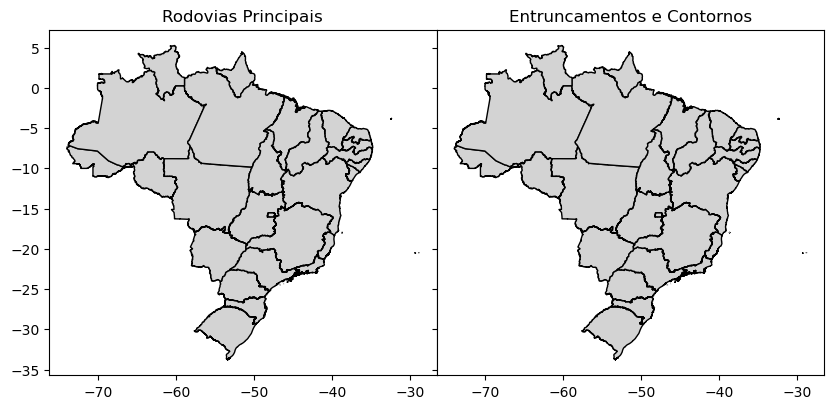

In [ ]:
brasil = gpd.read_file("https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_BRA_shp.zip", layer="gadm41_BRA_1")
cores = list(mcolors.TABLEAU_COLORS.keys())

fig = plt.figure(figsize=(10,10))

gs = fig.add_gridspec(1, 2, wspace=0, width_ratios=[1, 1], hspace=0, height_ratios=[1])
(ax1, ax2) = gs.subplots(sharex=True, sharey=True)

ax1.set_title("Rodovias Principais")
ax2.set_title("Entruncamentos e Contornos")

brasil.plot(ax=ax1, color='lightgray', edgecolor='black')
brasil.plot(ax=ax2, color='lightgray', edgecolor='black')
for i, (index, linha) in enumerate(pista_gdf.iterrows()):
    cor = cores[i % len(cores)]
    if linha['rodovia'].startswith('BR'):
        pista_gdf.iloc[[i]].plot(ax=ax1, color=cor, linewidth=2, alpha=0.7)
    pista_gdf.iloc[[i]].plot(ax=ax2, color=cor, linewidth=2, alpha=0.7)

# plt.legend(title="Rodovias - Concessionárias", loc="upper left")
plt.savefig('output/rodovias.pdf')

In [ ]:
pista_gdf['estado'] = pista_gdf['rodovia'].map(lambda x: x.split('/')[1])
pista_gdf = pista_gdf[['rodovia', 'estado', 'sentido', 'concessionaria', 'km', 'ano_do_pnv_snv', 'geometry']]
pista_gdf

comparação dos dados do OpenStreetMap com os dados da ANTT da BR-163

In [ ]:
df = pd.read_csv('data/rodovias_MT-MS/points.csv')
df['geometry'] = df.apply(wkt.loads)
pista_osm_gdf = gpd.GeoDataFrame(df, crs="")
pista_osm_gdf.set_crs(epsg=3857, inplace=True)
pista_osm_gdf.to_crs(epsg=4326, inplace=True)
#adicionar os pontos à uma lineString
pista_osm_line = geom.LineString(pista_osm_gdf['geometry'].values)
pista_osm_gdf = gpd.GeoDataFrame({'geometry': [pista_osm_line]}, crs="EPSG:4326")
pista_osm_gdf

Calculando a distância entre os pontos do OpenStreetMap e da ANTT

In [ ]:
rodovias_mt_ms = pista_gdf[pista_gdf['estado'].isin(['MT', 'MS'])]
rodovias_mt_ms

In [ ]:
line_rodo_mt_ms = rodovias_mt_ms.unary_union
distancia = frechet_distance(line_rodo_mt_ms, pista_osm_line)

In [ ]:
print(f"A distância de Fréchet entre as rodovias de MT/MS e a linha do OSM é de {distancia}.")

In [ ]:
brasil = gpd.read_file("https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_BRA_shp.zip", layer="gadm41_BRA_1")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title("Rodovias Principais")

brasil.plot(ax=ax, color='lightgray', edgecolor='black')
pista_osm_gdf.plot(ax=ax, color='red', alpha=0.7, label="BR-163 - OSM")
pista_gdf[pista_gdf['estado'] == 'MT'].plot(ax=ax, color='blue', alpha=0.7, label="BR-163 - ANTT")
